In [5]:
# projet analyse de donné < realise par yahia TEFFAHI __ MASTER 1 __ IA ___G2_ workshop_4>
# import libraries
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head() 	# first 5 lines

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
 df.head() 	# first 5 lines

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df['math score'].mean()

np.float64(66.089)

In [10]:
df['math score'].std()

15.163080096009468

In [11]:
df['math score'].quantile ([0.25 ,0.5 ,0.75])

0.25    57.0
0.50    66.0
0.75    77.0
Name: math score, dtype: float64

In [12]:
df.var(numeric_only=True)

math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64

In [13]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [14]:
df[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

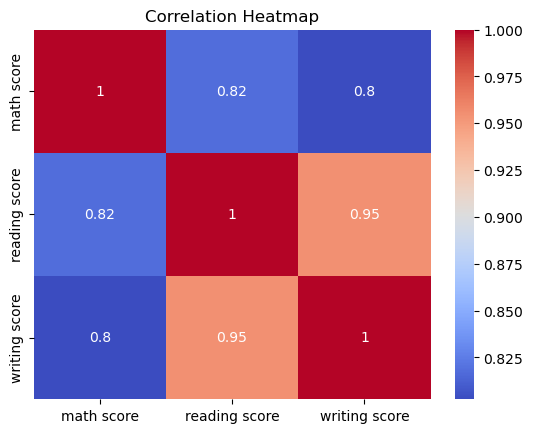

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
#sns.heatmap(df.corr(numeric_only=True), cmap='Oranges')
plt.title("Correlation Heatmap")
plt.show()
#Purples Oranges viridis

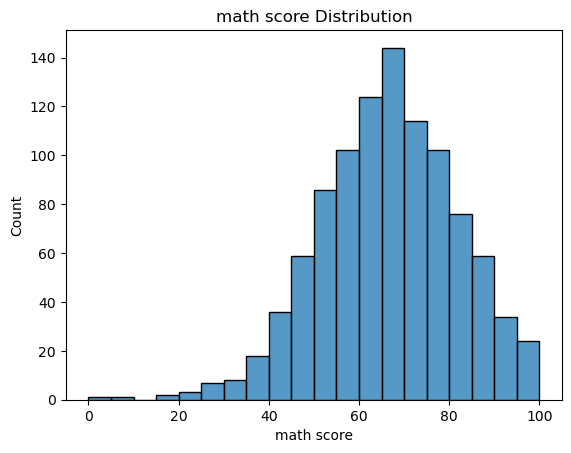

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram
sns.histplot(df['math score'], bins=20)
plt.title("math score Distribution")
plt.xlabel("math score")
plt.ylabel("Count")
plt.show()

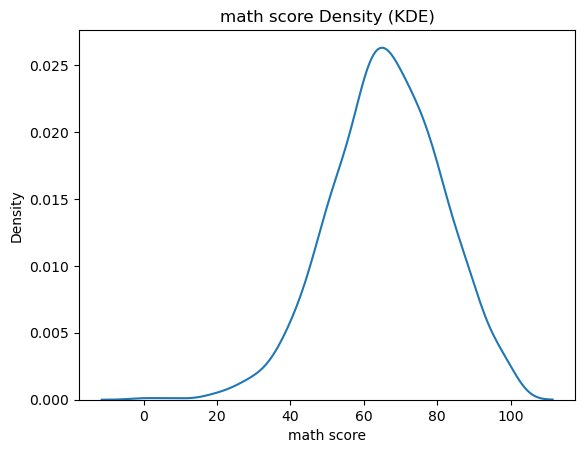

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# la courbe KDE
sns.kdeplot(df['math score'])
plt.title("math score Density (KDE)")
plt.xlabel("math score")
plt.ylabel("Density")
plt.show()

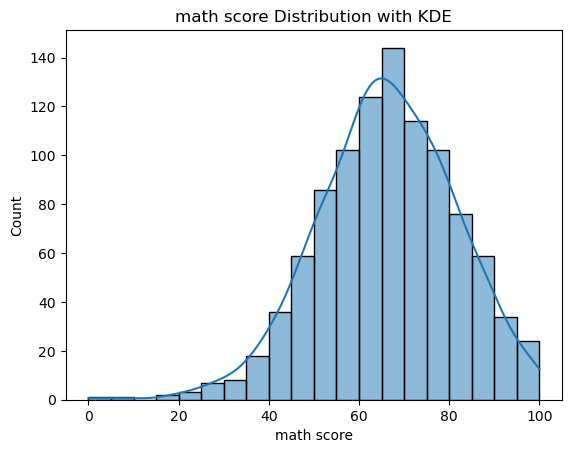

In [19]:
# Histogram with KDE
sns.histplot(df['math score'], bins=20, kde=True)
plt.title("math score Distribution with KDE")
plt.xlabel("math score")
plt.ylabel("Count")
plt.show()

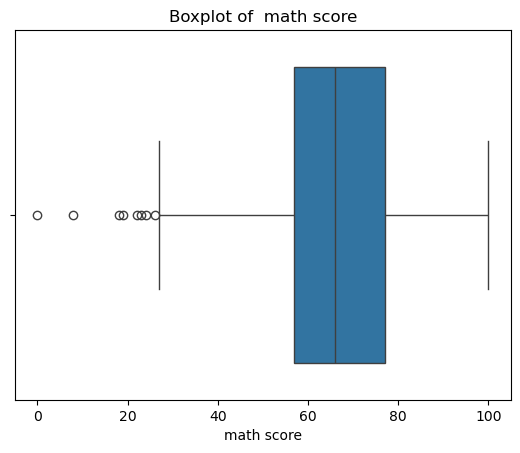

In [21]:
# Boxplot to detect outliers
sns.boxplot(x=df['math score'])
plt.title("Boxplot of  math score")
plt.xlabel("math score")
plt.show()

In [22]:
print(df[df['gender'] == 'female']['math score'].dropna())
print(df[df['gender'] == 'male']['math score'].dropna())

0      72
1      69
2      90
5      71
6      88
       ..
993    62
995    88
997    59
998    68
999    77
Name: math score, Length: 518, dtype: int64
3      47
4      76
7      40
8      64
10     58
       ..
985    57
987    81
990    86
994    63
996    62
Name: math score, Length: 482, dtype: int64


In [23]:
print("female count:", df[df['gender'] == 'female']['math score'].dropna().shape[0])
print("male count:", df[df['gender'] == 'male']['math score'].dropna().shape[0])

female count: 518
male count: 482


In [25]:
female_math_score = df[df['gender'] == 'female']['math score'].dropna()
male_math_score = df[df['gender'] == 'male']['math score'].dropna()

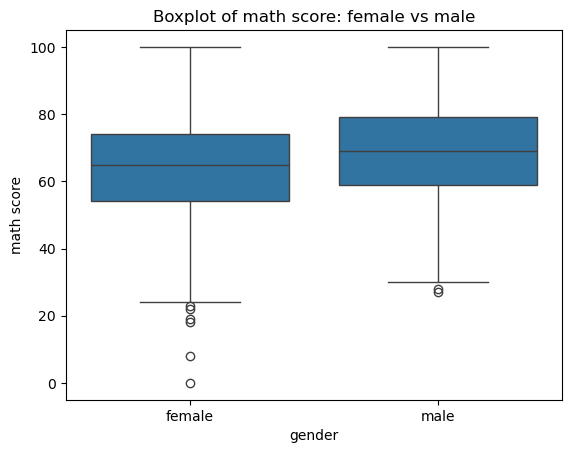

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_box = pd.DataFrame({
    'math score': pd.concat([female_math_score, male_math_score]),
    'gender': ['female'] * len(female_math_score) + ['male'] * len(male_math_score)
})

sns.boxplot(x='gender', y='math score', data=df_box)
plt.title("Boxplot of math score: female vs male")
plt.ylabel("math score")
plt.show()

In [29]:
from scipy.stats import f_oneway

# Extraire les prix valides
female_math_score = df[df['gender'] == 'female']['math score'].dropna()
male_math_score = df[df['gender'] == 'male']['math score'].dropna()
print('female_math_score',female_math_score)

F_stat, p_val = f_oneway(female_math_score, male_math_score)
print("F-statistic:", F_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("→ Différence significative entre female et male.")
else:
    print("→ Pas de différence significative détectée.")

female_math_score 0      72
1      69
2      90
5      71
6      88
       ..
993    62
995    88
997    59
998    68
999    77
Name: math score, Length: 518, dtype: int64
F-statistic: 28.979336095030888
p-value: 9.120185549332254e-08
→ Différence significative entre female et male.


In [32]:

from scipy.stats import f_oneway


gender = df['gender'].unique()


groupes = [df[df['gender'] == gender]['math score'].dropna() for gender in gender]


F_stat, p_val = f_oneway(*groupes)

print("gender comparées:", gender)

print("F-statistic:", F_stat)
print("p-value:", p_val)

# Interprétation
if p_val < 0.05:
    print("→ Il existe une différence significative entre au moins deux marques.")
else:
    print("→ Pas de différence significative détectée entre les marques.")

gender comparées: ['female' 'male']
F-statistic: 28.979336095030888
p-value: 9.120185549332254e-08
→ Il existe une différence significative entre au moins deux marques.


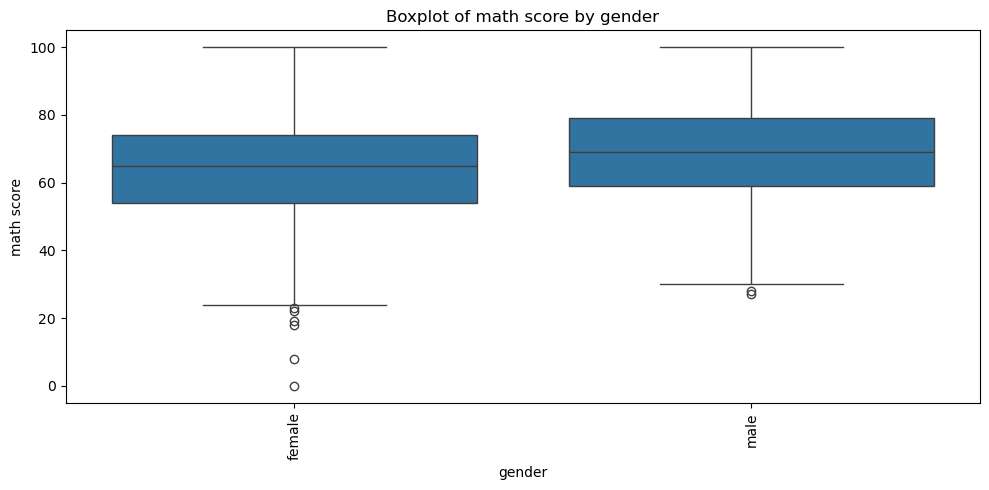

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


df_clean = df.dropna(subset=['gender', 'math score'])


plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='math score', data=df_clean)


plt.title("Boxplot of math score by gender")
plt.xlabel("gender")
plt.ylabel("math score")
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [35]:
import statsmodels.api as sm
import numpy as np

X = df[['reading score']]  


y = df['math score']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2012.
Date:                Tue, 30 Dec 2025   Prob (F-statistic):          1.79e-241
Time:                        23:24:48   Log-Likelihood:                -3585.3
No. Observations:                1000   AIC:                             7175.
Df Residuals:                     998   BIC:                             7184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3576      1.338      5.498

Intercept (β0): 7.357588118537592
Pente (β1): 0.8491002021348064


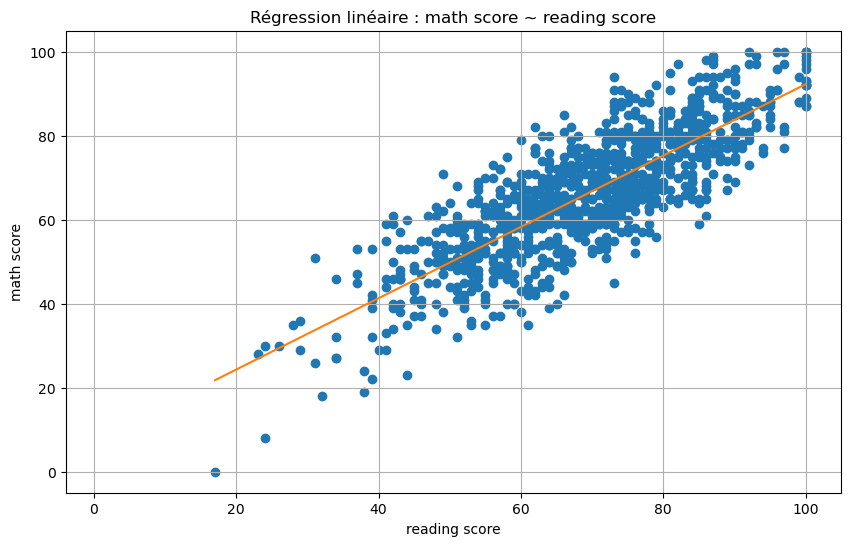

In [36]:
beta0 = model.params['const']       
beta1 = model.params['reading score']   

print("Intercept (β0):", beta0)
print("Pente (β1):", beta1)


x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = beta0 + beta1 * x_vals


plt.figure(figsize=(10,6))
plt.scatter(df['reading score'], df['math score'])
plt.plot(x_vals, y_vals)
plt.xlabel('reading score')
plt.ylabel('math score')
plt.title('Régression linéaire : math score ~ reading score')
plt.grid(True)
plt.show()


In [38]:
import statsmodels.api as sm

# Variables explicatives
X = df[['reading score', 'writing score']]

# Variable dépendante
y = df['math score']

# Ajouter la constante
X = sm.add_constant(X)

# Ajuster le modèle
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Tue, 30 Dec 2025   Prob (F-statistic):          2.25e-243
Time:                        23:29:42   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5241      1.328      5.665

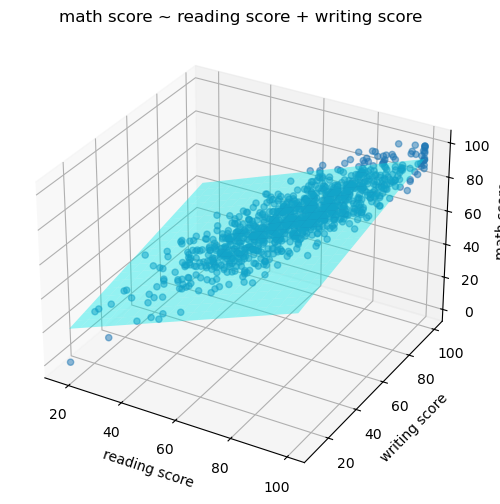

In [39]:
# Coefficients
b0 = model.params['const']
b1 = model.params['reading score']
b2 = model.params['writing score']

# Nuage de points
mp = df['reading score']
writing_score = df['writing score']
math_score = df['math score']

# Grille pour le plan
mp_range = np.linspace(mp.min(), mp.max(), 20)
writing_score_range = np.linspace(writing_score.min(), writing_score.max(), 20)
mp_grid, writing_score_grid = np.meshgrid(mp_range, writing_score_range)

# Plan prédit
math_score_pred_grid = b0 + b1 * mp_grid + b2 * writing_score_grid

# Graphique 3D
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(mp, writing_score, math_score, alpha=0.5)
ax.plot_surface(mp_grid, writing_score_grid, math_score_pred_grid, color='cyan', alpha=0.4)

ax.set_xlabel("reading score")
ax.set_ylabel("writing score")
ax.set_zlabel("math score")
ax.set_title("math score ~ reading score + writing score")

plt.show()